<a href="https://colab.research.google.com/github/hjfuentes/Laboratorio-Datos-Sociales/blob/main/Forecasting/M02/20260225_Modelo_Sarima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Paquetes

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

# Datos

In [ ]:
commodities_yahoo = {
    "USDPEN=X": "USDPEN",
    "HG=F": "Cobre",
    "GC=F": "Oro",
    "SI=F": "Plata",
    "BZ=F": "Petróleo Brent",
    "CL=F": "Petróleo WTI"
}

- 🔧 **Cobre (HG=F)**:

Es el principal producto de exportación del Perú.

- ➡️ **Si sube el precio del cobre**, entran más dólares al país por exportaciones.

- ➡️ Esto **fortalece el sol** (baja el USD/PEN).

---

- **Oro (GC=F)**:

También es una gran exportación peruana y un activo refugio.

- ➡️ **Si sube el oro**, puede aumentar la entrada de divisas o reflejar incertidumbre global.

- ➡️ Puede hacer que el **tipo de cambio baje o se mantenga estable**.

---

- 🥈 **Plata (SI=F)**:

- Aunque menor en volumen, también es parte de las exportaciones mineras.

- ➡️ **Cuando sube**, ayuda a generar más dólares, pero su efecto es **menos fuerte** que el del cobre.

- 🛳️ **Brent** se comercia en Europa (ICE) y marca el precio global del crudo marino.
- 🏞️ **WTI** es más liviano y dulce, se negocia en EE.UU. (NYMEX) y refleja el mercado interno norteamericano.

In [ ]:
# Selección de símbolos a consultar
tickers = list(commodities_yahoo.keys())  # Puedes cambiar el slicing si quieres más
tickers

['USDPEN=X', 'HG=F', 'GC=F', 'SI=F', 'BZ=F', 'CL=F']

In [ ]:
yf.download(tickers='HG=F',start='2025-07-21')

/tmp/ipython-input-342/956457024.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  yf.download(tickers='HG=F',start='2025-07-21')
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,HG=F,HG=F,HG=F,HG=F,HG=F
Date,,,,,
2025-07-21,5.6105,5.6170,5.5505,5.5505,583
2025-07-22,5.6970,5.6995,5.6430,5.6430,729
2025-07-23,5.7950,5.8655,5.7510,5.7510,607
2025-07-24,5.7770,5.8950,5.7720,5.8605,686
2025-07-25,5.7635,5.7800,5.7280,5.7750,911
...,...,...,...,...,...
2026-02-19,5.7300,5.7350,5.7250,5.7350,993
2026-02-20,5.8310,5.8605,5.7275,5.7420,658


In [ ]:
yf.download(tickers=['HG=F',"GC=F"],start='2025-07-21')

/tmp/ipython-input-342/179651550.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  yf.download(tickers=['HG=F',"GC=F"],start='2025-07-21')
[*********************100%***********************]  2 of 2 completed


Price             Close                 High                  Low          \
Ticker             GC=F    HG=F         GC=F    HG=F         GC=F    HG=F   
Date                                                                        
2025-07-21  3401.899902  5.6105  3411.699951  5.6170  3350.300049  5.5505   
2025-07-22  3439.199951  5.6970  3441.000000  5.6995  3395.600098  5.6430   
2025-07-23  3394.100098  5.7950  3433.899902  5.8655  3388.100098  5.7510   
2025-07-24  3371.000000  5.7770  3371.000000  5.8950  3367.000000  5.7720   
2025-07-25  3334.000000  5.7635  3345.000000  5.7800  3326.500000  5.7280   
...                 ...     ...          ...     ...          ...     ...   
2026-02-19  4975.899902  5.7300  5014.700195  5.7350  4975.899902  5.7250   
2026-02-20  5059.299805  5.8310  5072.700195  5.8605  5039.500000  5.7275   
2026-02-23  5204.700195  5.7730  5211.600098  5.8800  5120.299805  5.7505   
2026-02-24  5155.799805  5.9230  5159.000000  5.9285  5112.700195  5.8540   
2026-02-25  5183.700195  6.0435  5237.299805  6.0675  5135.899902  5.9550   

Price              Open          Volume         
Ticker             GC=F    HG=F    GC=F   HG=F  
Date                                            
2025-07-21  3350.300049  5.5505      53    583  
2025-07-22  3411.000000  5.6430      39    729  
2025-07-23  3430.300049  5.7510      63    607  
2025-07-24  3367.000000  5.8605    1175    686  
2025-07-25  3344.000000  5.7750      67    911  
...                 ...     ...     ...    ...  
2026-02-19  5014.700195  5.7350      37    993  
2026-02-20  5039.500000  5.7420     134    658  
2026-02-23  5120.299805  5.8800     779    764  
2026-02-24  5158.799805  5.8540     779    764  
2026-02-25  5160.000000  5.9555  107734  53087  

[152 rows x 10 columns]

In [ ]:
# Descarga de datos
portafolio = yf.download(tickers=tickers, start='2023-01-01')['Close']

# Renombrar columnas usando el diccionario
portafolio.rename(columns=commodities_yahoo, inplace=True)

# Mostrar resultados
portafolio.head()

/tmp/ipython-input-342/329221402.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  portafolio = yf.download(tickers=tickers, start='2023-01-01')['Close']
[*********************100%***********************]  6 of 6 completed


Ticker,Petróleo Brent,Petróleo WTI,Oro,Cobre,Plata,USDPEN
Date,,,,,,
2023-01-02,NaN,NaN,NaN,NaN,NaN,3.801000
2023-01-03,82.099998,76.930000,1839.699951,3.7660,24.059000,3.729472
2023-01-04,77.839996,72.839996,1852.800049,3.7395,23.792000,3.812500
2023-01-05,78.690002,73.669998,1834.800049,3.8180,23.257999,3.812500
2023-01-06,78.570000,73.769997,1864.199951,3.9085,23.822001,3.800000


array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

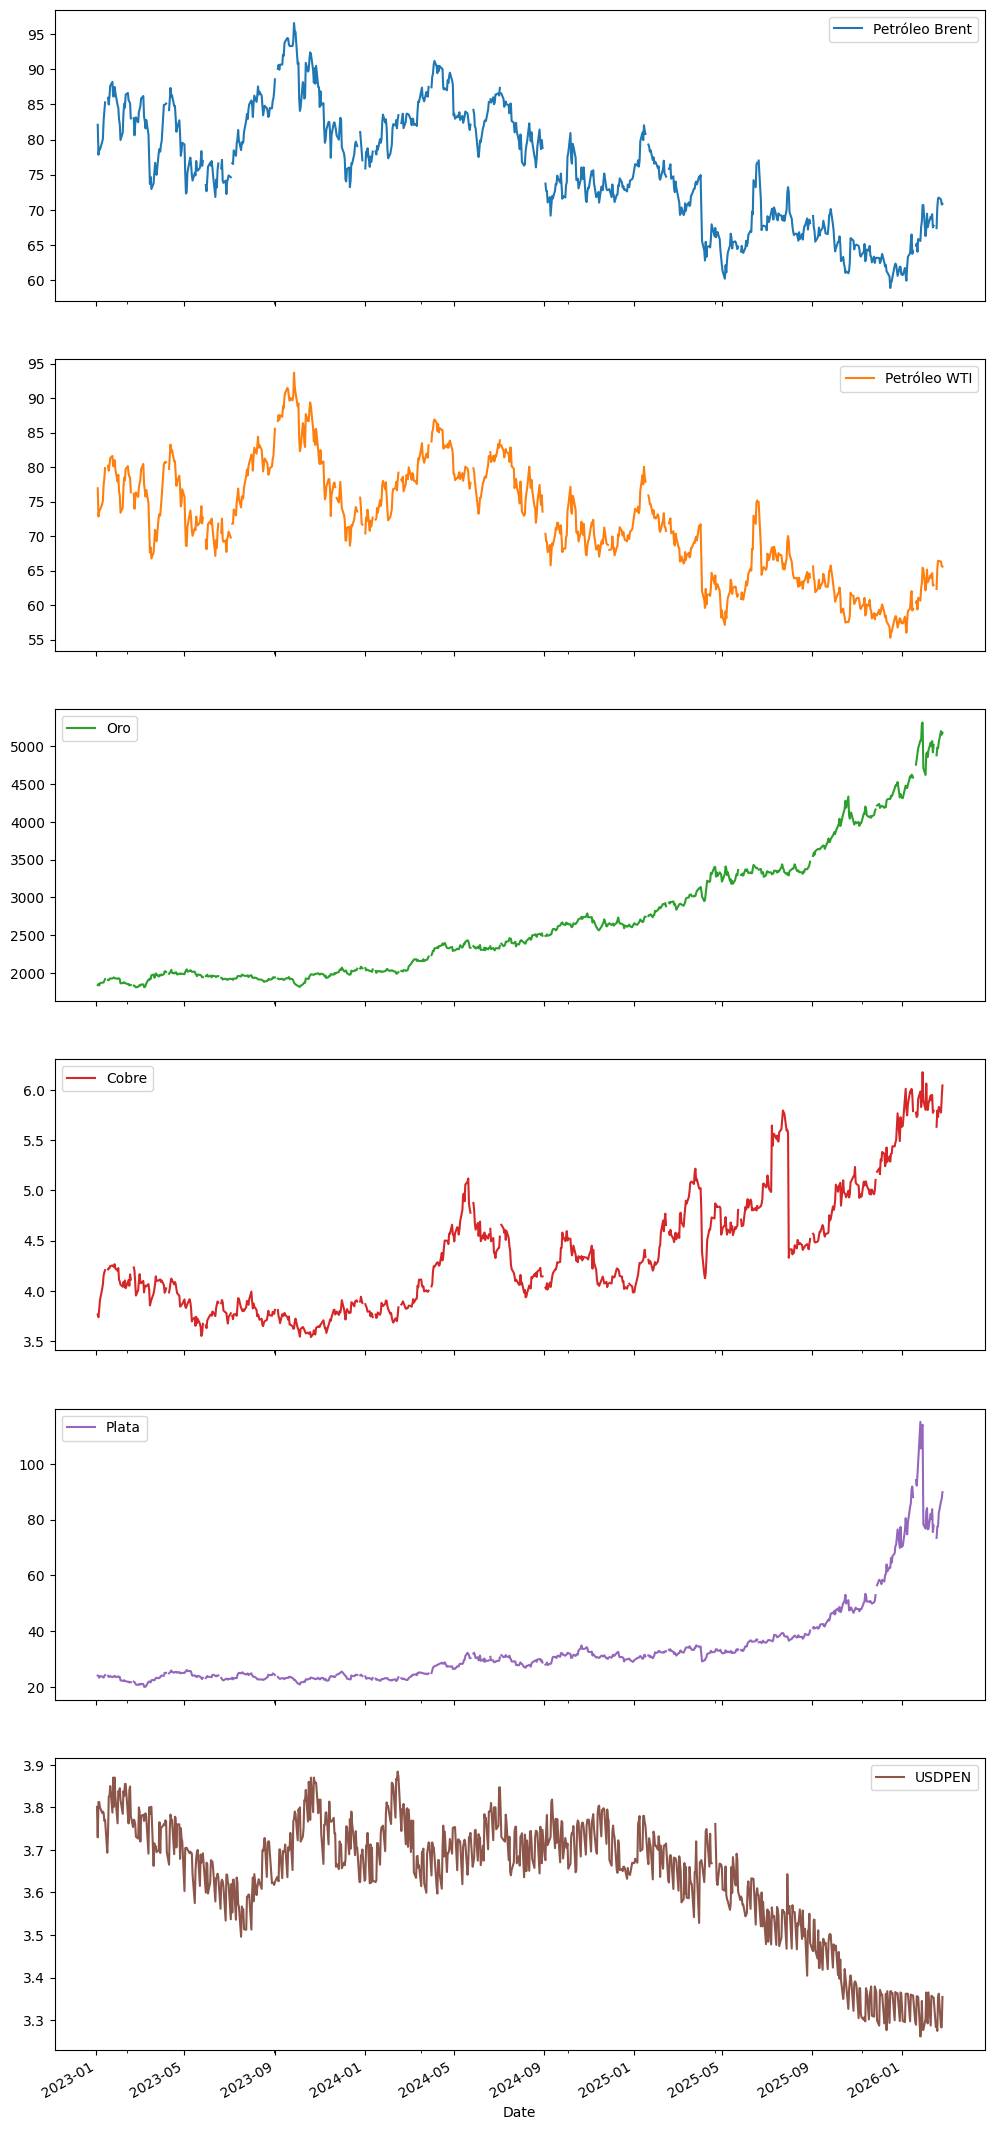

In [ ]:
portafolio.plot(subplots=True,figsize=(12,30))

In [ ]:
portafolio.corr()

Ticker,Petróleo Brent,Petróleo WTI,Oro,Cobre,Plata,USDPEN
Ticker,,,,,,
Petróleo Brent,1.000000,0.992233,-0.795064,-0.644512,-0.625857,0.688254
Petróleo WTI,0.992233,1.000000,-0.781796,-0.635313,-0.631020,0.683958
Oro,-0.795064,-0.781796,1.000000,0.890380,0.915715,-0.838389
Cobre,-0.644512,-0.635313,0.890380,1.000000,0.847148,-0.716300
Plata,-0.625857,-0.631020,0.915715,0.847148,1.000000,-0.803668
USDPEN,0.688254,0.683958,-0.838389,-0.716300,-0.803668,1.000000


In [ ]:
from statsmodels.tsa.stattools import adfuller
# Aplica la prueba de Dickey-Fuller aumentada
result = adfuller(portafolio['USDPEN'].dropna())

# Despliega los resultados
print('Estadístico ADF:', result[0])
print('Valor p:', result[1])
print('Valores críticos:')
for key, value in result[4].items():
    print(f'   {key}: {value}')

# Interpretación del resultado
if result[1] > 0.05:
    print("La serie temporal tiene una raíz unitaria y es no estacionaria.")
else:
    print("La serie temporal es estacionaria.")

Estadístico ADF: -0.6616170350199573
Valor p: 0.8564427192956823
Valores críticos:
   1%: -3.438581476199162
   5%: -2.865173218890781
   10%: -2.56870466056054
La serie temporal tiene una raíz unitaria y es no estacionaria.


In [ ]:
rend = portafolio.diff().dropna()

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

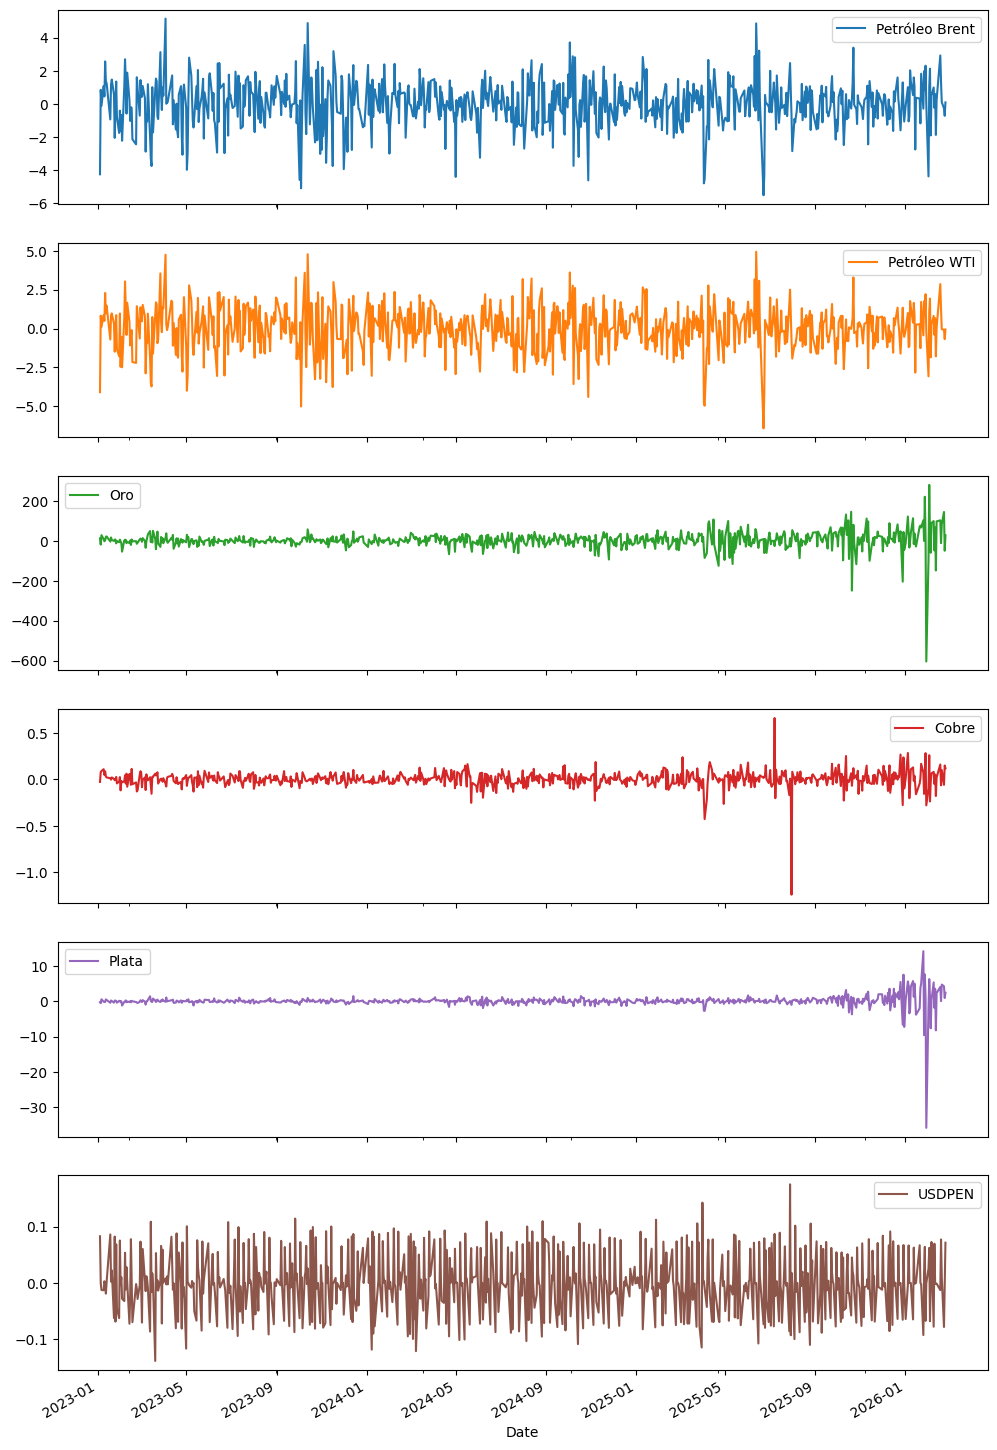

In [ ]:
rend.plot(subplots=True,figsize=(12,20))

In [ ]:
from statsmodels.tsa.stattools import adfuller
# Aplica la prueba de Dickey-Fuller aumentada
result = adfuller(portafolio['USDPEN'].diff().dropna())

# Despliega los resultados
print('Estadístico ADF:', result[0])
print('Valor p:', result[1])
print('Valores críticos:')
for key, value in result[4].items():
    print(f'   {key}: {value}')

# Interpretación del resultado
if result[1] > 0.05:
    print("La serie temporal tiene una raíz unitaria y es no estacionaria.")
else:
    print("La serie temporal es estacionaria.")

Estadístico ADF: -7.372904710155864
Valor p: 8.875353686622735e-11
Valores críticos:
   1%: -3.4385918508847646
   5%: -2.865177791819505
   10%: -2.568707096601096
La serie temporal es estacionaria.


In [ ]:
sarima_ = SARIMAX(portafolio['USDPEN'],order=(1,1,0),seasonal_order=(1,0,0,5)).fit()

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
print(sarima_.summary())

                                     SARIMAX Results                                     
Dep. Variable:                            USDPEN   No. Observations:                  819
Model:             SARIMAX(1, 1, 0)x(1, 0, 0, 5)   Log Likelihood                1396.780
Date:                           Wed, 25 Feb 2026   AIC                          -2787.560
Time:                                   23:01:32   BIC                          -2773.439
Sample:                                        0   HQIC                         -2782.141
                                           - 819                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4174      0.032    -12.991      0.000      -0.480      -0.354
ar.S.L5        0.3966      0.032     12.411

<Axes: xlabel='Date'>

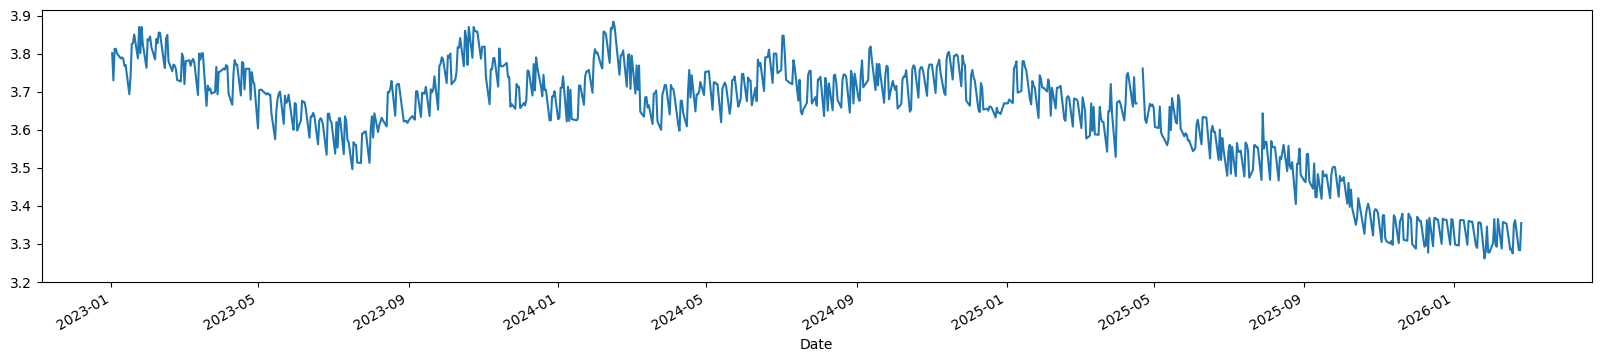

In [ ]:
portafolio['USDPEN'].plot(ylim=(3.2),figsize=(20,4))

<Axes: xlabel='Date'>

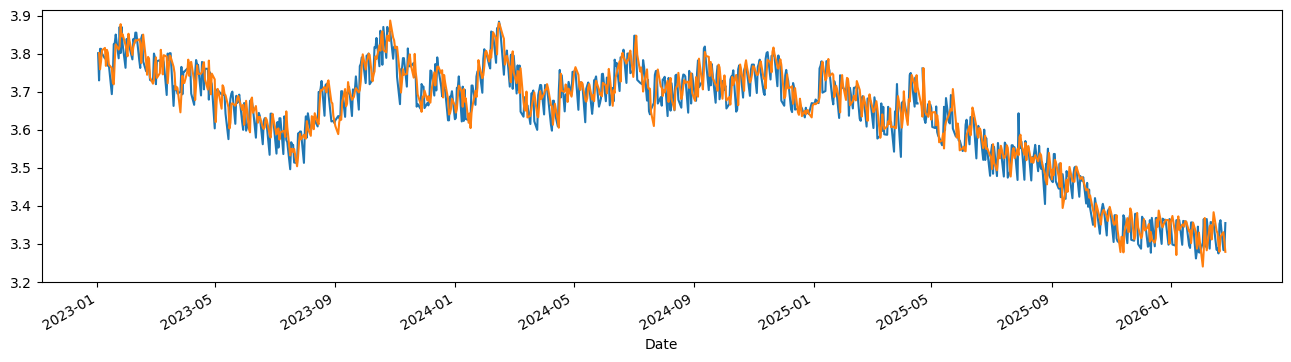

In [ ]:
portafolio['USDPEN'].plot(ylim=(3.2),figsize=(16,4))
sarima_.fittedvalues[1:].plot()

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


<Axes: >

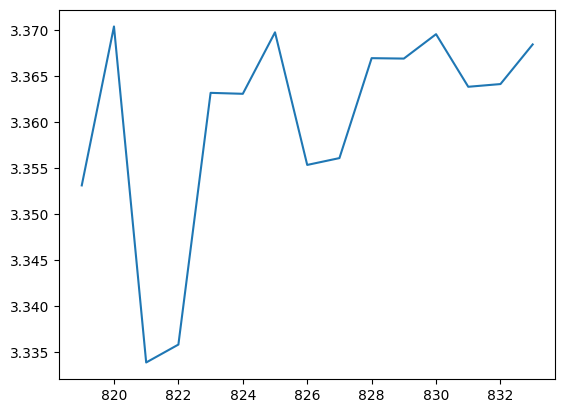

In [ ]:
sarima_.forecast(15).plot()

<Axes: xlabel='Date'>

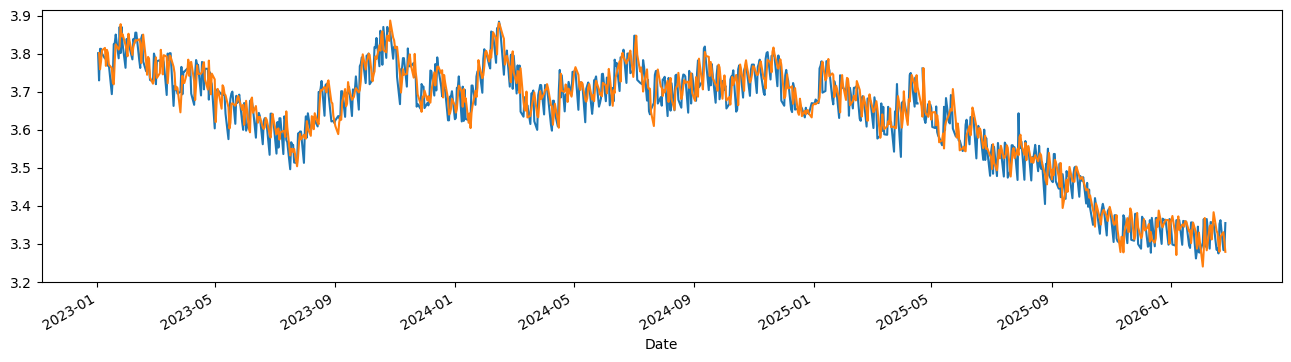

In [ ]:
portafolio['USDPEN'].plot(ylim=(3.2),figsize=(16,4))
sarima_.fittedvalues[1:].plot()

In [ ]:
n_step = 15
train = portafolio['USDPEN'][:-n_step]
test = portafolio['USDPEN'][-n_step:]

In [ ]:
sarima_2 = SARIMAX(train,order=(1,1,0),seasonal_order=(1,0,0,5)).fit()

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
forecast = pd.Series(data=sarima_2.forecast(n_step).values,index=test.index)

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


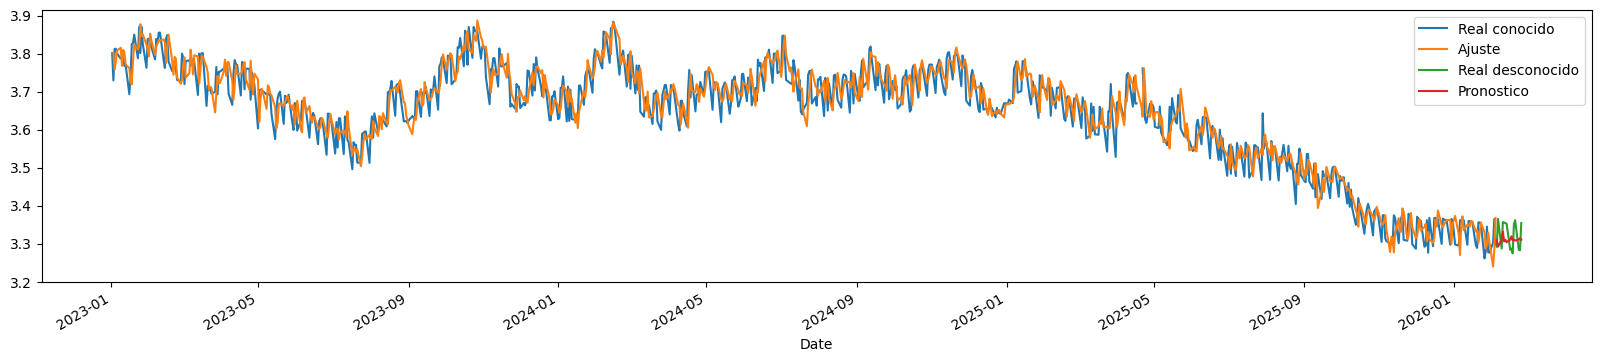

In [ ]:
train.plot(ylim=(3.2),figsize=(20,4),label='Real conocido')
sarima_2.fittedvalues[1:].plot(label='Ajuste')
test.plot(label='Real desconocido')
forecast.plot(label='Pronostico')
plt.legend()
plt.show()

In [ ]:
portafolio['USDPEN'].head(10)

,USDPEN
Date,
2023-01-02,3.801000
2023-01-03,3.729472
2023-01-04,3.812500
2023-01-05,3.812500
2023-01-06,3.800000
2023-01-09,3.787000
2023-01-10,3.790000
2023-01-11,3.787000
2023-01-12,3.768000


# Completando semanas

In [ ]:
portafolio2 = portafolio.resample('D').interpolate(method='akima')

In [ ]:
portafolio3 = portafolio2.copy()
portafolio4 = portafolio.copy()

In [ ]:
portafolio3.reset_index(inplace=True)
portafolio4.reset_index(inplace=True)

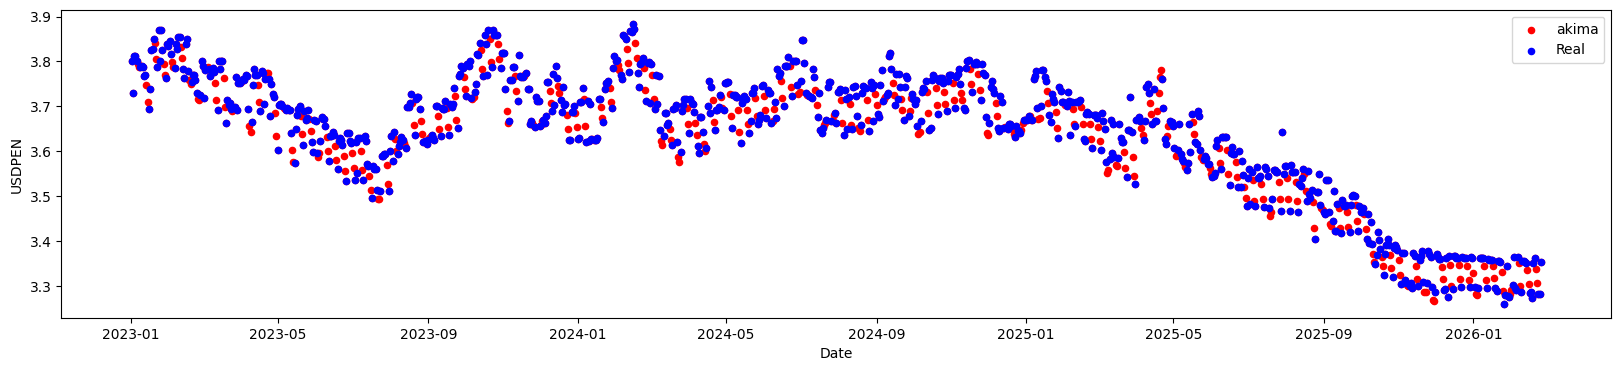

In [ ]:
fig,ax = plt.subplots(figsize=(20,4))
portafolio3.plot.scatter(x='Date',y='USDPEN',ax=ax,label='akima',color='red')
portafolio4.plot.scatter(x='Date',y='USDPEN',ax=ax,label='Real',color='blue')
plt.legend()

<Axes: xlabel='Date'>

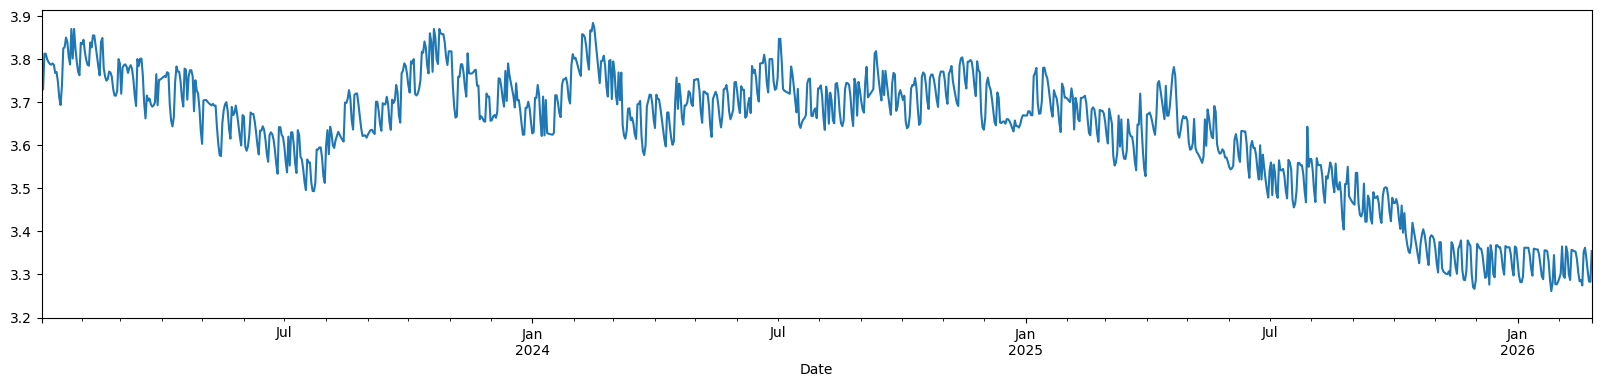

In [ ]:
portafolio2.USDPEN.plot(ylim=(3.2),figsize=(20,4))

In [ ]:
sarima_ = SARIMAX(portafolio2['USDPEN'],order=(1,1,0),seasonal_order=(3,1,0,7)).fit()

In [ ]:
print(sarima_.summary())

                                     SARIMAX Results                                     
Dep. Variable:                            USDPEN   No. Observations:                 1151
Model:             SARIMAX(1, 1, 0)x(3, 1, 0, 7)   Log Likelihood                2203.753
Date:                           Wed, 25 Feb 2026   AIC                          -4397.506
Time:                                   23:01:38   BIC                          -4372.299
Sample:                               01-02-2023   HQIC                         -4387.988
                                    - 02-25-2026                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2378      0.025     -9.543      0.000      -0.287      -0.189
ar.S.L7       -0.7696      0.026    -29.825

<Axes: xlabel='Date'>

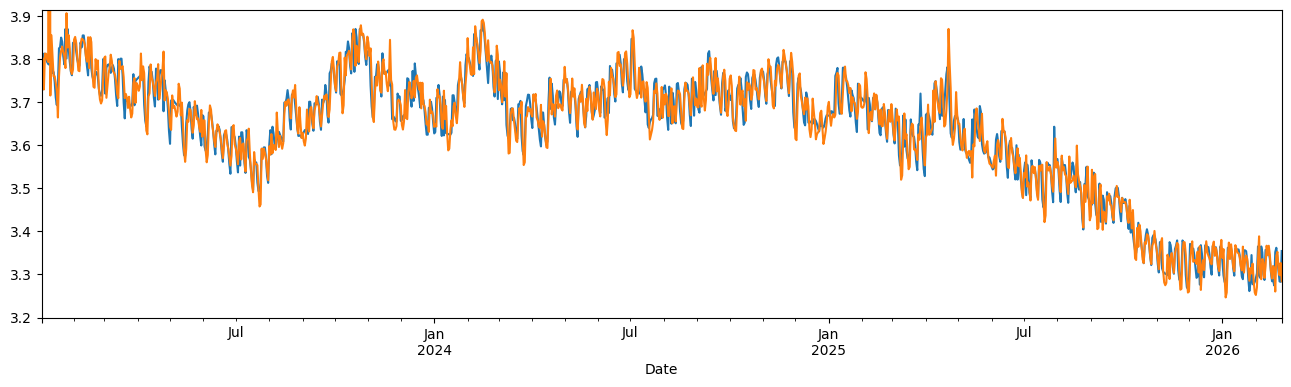

In [ ]:
portafolio2['USDPEN'].plot(ylim=(3.2),figsize=(16,4))
sarima_.fittedvalues[1:].plot()

In [ ]:
n_step = 14
train = portafolio2['USDPEN'][:-n_step]
test = portafolio2['USDPEN'][-n_step:]

In [ ]:
sarima_2 = SARIMAX(train,order=(1,1,0),seasonal_order=(3,0,0,7)).fit()

In [ ]:
train.head(10)

,USDPEN
Date,
2023-01-02,3.801000
2023-01-03,3.729472
2023-01-04,3.812500
2023-01-05,3.812500
2023-01-06,3.800000
2023-01-07,3.793385
2023-01-08,3.788783
2023-01-09,3.787000
2023-01-10,3.790000


In [ ]:
forecast = pd.Series(data=sarima_2.forecast(n_step).values,index=test.index)

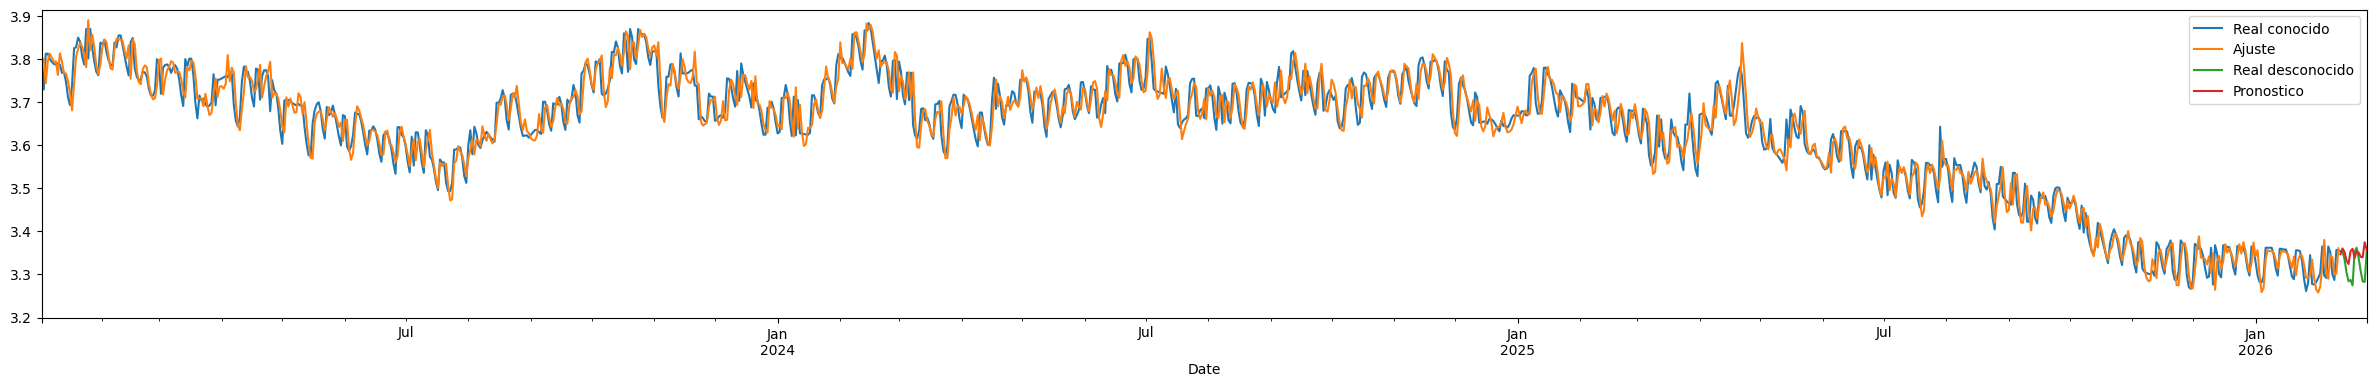

In [ ]:
train.plot(ylim=(3.2),figsize=(30,4),label='Real conocido')
sarima_2.fittedvalues[1:].plot(label='Ajuste')
test.plot(label='Real desconocido')
forecast.plot(label='Pronostico')
plt.legend()
plt.show()

In [ ]:
r2_train = r2_score(train[1:], sarima_2.fittedvalues[1:])
print("🔧 R² en conjunto de entrenamiento:", round(r2_train, 4))
# R² en prueba: comparamos los valores reales del test con el pronóstico (forecast)
r2_test = r2_score(test, forecast)
print("🧪 R² en conjunto de prueba:", round(r2_test, 4))

🔧 R² en conjunto de entrenamiento: 0.9386
🧪 R² en conjunto de prueba: -0.922


# Modelo (1,1,0)x(3,0,0,7)

In [ ]:
n_step = 30
train = portafolio2['USDPEN'][:-n_step]
test = portafolio2['USDPEN'][-n_step:]

In [ ]:
sarima_2 = SARIMAX(train,order=(1,1,0),seasonal_order=(3,0,0,7)).fit()

In [ ]:
train.head(10)

,USDPEN
Date,
2023-01-02,3.801000
2023-01-03,3.729472
2023-01-04,3.812500
2023-01-05,3.812500
2023-01-06,3.800000
2023-01-07,3.793385
2023-01-08,3.788783
2023-01-09,3.787000
2023-01-10,3.790000


In [ ]:
forecast = pd.Series(data=sarima_2.forecast(n_step).values,index=test.index)

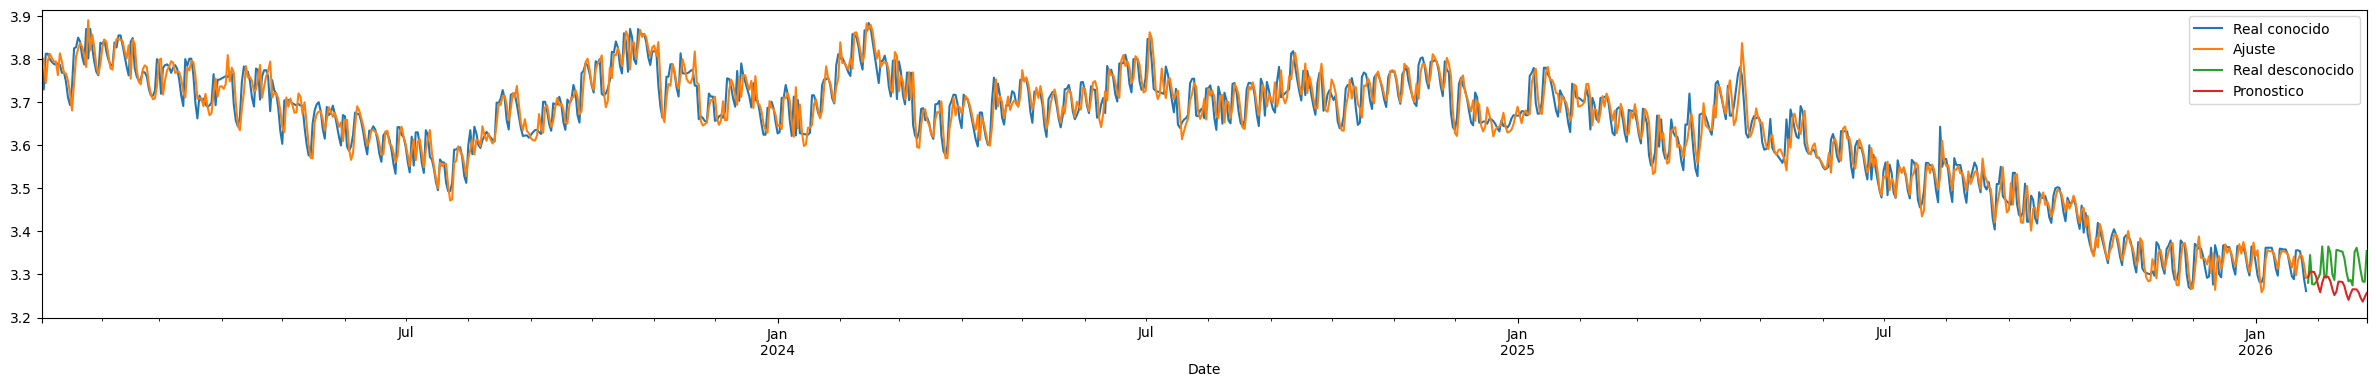

In [ ]:
train.plot(ylim=(3.2),figsize=(30,4),label='Real conocido')
sarima_2.fittedvalues[1:].plot(label='Ajuste')
test.plot(label='Real desconocido')
forecast.plot(label='Pronostico')
plt.legend()
plt.show()

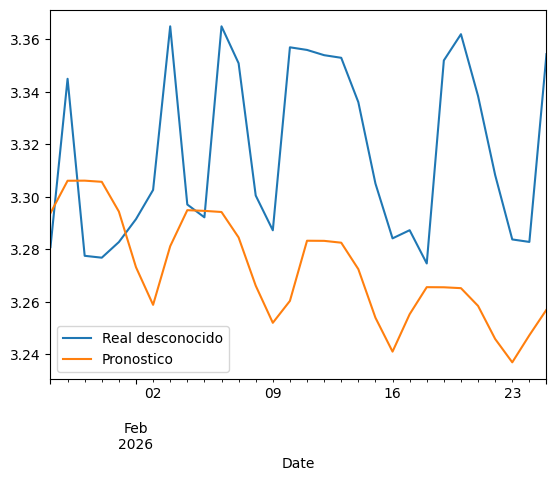

In [ ]:
test.plot(label='Real desconocido')
forecast.plot(label='Pronostico')
plt.legend()
plt.show()

In [ ]:
#forecast.to_excel("forecast.xlsx")

In [ ]:
r2_train = r2_score(train[1:], sarima_2.fittedvalues[1:])
print("🔧 R² en conjunto de entrenamiento:", round(r2_train, 4))
# R² en prueba: comparamos los valores reales del test con el pronóstico (forecast)
r2_test = r2_score(test, forecast)
print("🧪 R² en conjunto de prueba:", round(r2_test, 4))

🔧 R² en conjunto de entrenamiento: 0.9347
🧪 R² en conjunto de prueba: -2.0237


# Modelo (1,1,1)x(1,1,1,7)

In [ ]:
n_step = 35
train = portafolio2['USDPEN'][:-n_step]
test = portafolio2['USDPEN'][-n_step:]

In [ ]:
sarima_2 = SARIMAX(train,order=(1,1,1),seasonal_order=(1,1,1,7)).fit()

In [ ]:
print(sarima_2.summary())

                                     SARIMAX Results                                     
Dep. Variable:                            USDPEN   No. Observations:                 1116
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 7)   Log Likelihood                2298.899
Date:                           Wed, 25 Feb 2026   AIC                          -4587.798
Time:                                   23:01:49   BIC                          -4562.746
Sample:                               01-02-2023   HQIC                         -4578.324
                                    - 01-21-2026                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4897      0.043     11.264      0.000       0.405       0.575
ma.L1         -0.8151      0.033    -24.925

In [ ]:
forecast = sarima_2.forecast(n_step)

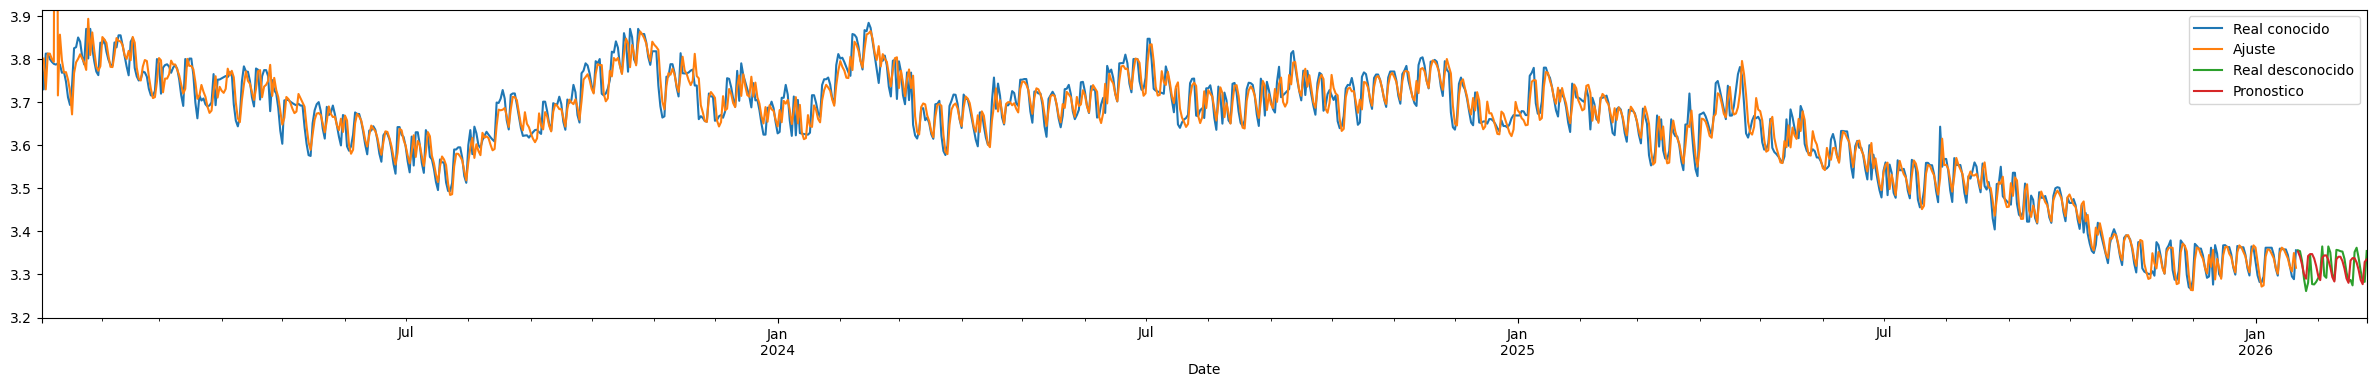

In [ ]:
train.plot(ylim=(3.2),figsize=(30,4),label='Real conocido')
sarima_2.fittedvalues[1:].plot(label='Ajuste')
test.plot(label='Real desconocido')
forecast.plot(label='Pronostico')
plt.legend()
plt.show()

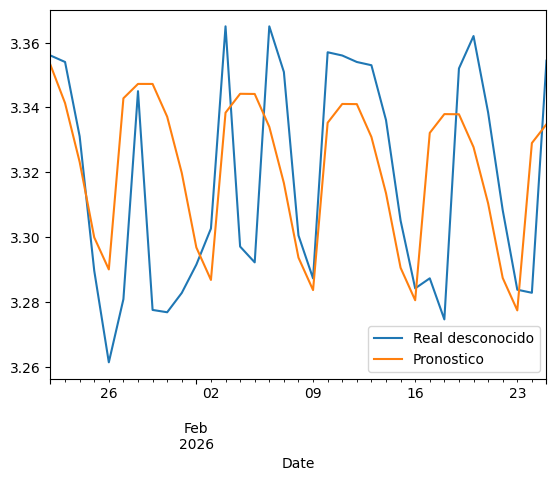

In [ ]:
test.plot(label='Real desconocido')
forecast.plot(label='Pronostico')
plt.legend()
plt.show()

In [ ]:
#forecast.to_excel("forecast.xlsx")

In [ ]:
rmse_train = mean_squared_error(train[8:], sarima_2.fittedvalues[8:])
print(f"🔧 RMSE en conjunto de entrenamiento: {rmse_train:.4f}")
rmse_test = mean_squared_error(test, forecast)
print(f"🧪 RMSE en conjunto de prueba: {rmse_test:.4f}")

🔧 RMSE en conjunto de entrenamiento: 0.0009
🧪 RMSE en conjunto de prueba: 0.0010


# Optimizacion

In [ ]:
n_step = 14
train = portafolio2['USDPEN'][:-n_step]
test = portafolio2['USDPEN'][-n_step:]

In [ ]:
from itertools import product

In [ ]:
# Define los valores posibles
p = q = range(0, 1)  # ARIMA(p,d,q) con d = 1 fijo
d = 1
D_vals = [0, 1]
P = Q = range(0, 6)  # SARIMA(P,D,Q,7)
seasonal_period = 7

In [ ]:
# Generar todas las combinaciones primero
combinaciones = list(product(p, q, P, Q, D_vals))
n_total = len(combinaciones)
resultados = []

# Iterar con contador
for i, (ar, ma, sar, sma, D) in enumerate(combinaciones):
    print(f"🔄 Iteración {i+1}/{n_total} → Probandp {(ar,1,ma)} x {(sar,D,sma,seasonal_period)}")

    try:
        # Definir y entrenar modelo
        modelo = SARIMAX(train,
                         order=(ar, d, ma),
                         seasonal_order=(sar, D, sma, seasonal_period),
                         enforce_stationarity=False,
                         enforce_invertibility=False, maxiter=500).fit(disp=False)

        # Predecir
        forecast = modelo.forecast(steps=len(test))

        # Calcular RMSE
        rmse_train = mean_squared_error(train[seasonal_period:], modelo.fittedvalues[seasonal_period:])
        rmse_test = mean_squared_error(test, forecast)

        # Guardar resultados
        resultados.append({
            'order': (ar, 1, ma),
            'seasonal_order': (sar, D, sma, seasonal_period),
            'rmse_train': rmse_train,
            'rmse_test': rmse_test
        })

        print(f"✅ {(ar,1,ma)} x {(sar,D,sma,seasonal_period)} → RMSE test: {rmse_test:.4f}")

    except Exception as e:
        print(f"❌ Error con {(ar,1,ma)} x {(sar,D,sma,seasonal_period)}: {e}")

🔄 Iteración 1/72 → Probandp (0, 1, 0) x (0, 0, 0, 7)
✅ (0, 1, 0) x (0, 0, 0, 7) → RMSE test: 0.0023
🔄 Iteración 2/72 → Probandp (0, 1, 0) x (0, 1, 0, 7)


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['maxiter']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['maxiter']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


✅ (0, 1, 0) x (0, 1, 0, 7) → RMSE test: 0.0119
🔄 Iteración 3/72 → Probandp (0, 1, 0) x (0, 0, 1, 7)


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['maxiter']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


✅ (0, 1, 0) x (0, 0, 1, 7) → RMSE test: 0.0034
🔄 Iteración 4/72 → Probandp (0, 1, 0) x (0, 1, 1, 7)


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['maxiter']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


✅ (0, 1, 0) x (0, 1, 1, 7) → RMSE test: 0.0010
🔄 Iteración 5/72 → Probandp (0, 1, 0) x (0, 0, 2, 7)


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['maxiter']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


✅ (0, 1, 0) x (0, 0, 2, 7) → RMSE test: 0.0031
🔄 Iteración 6/72 → Probandp (0, 1, 0) x (0, 1, 2, 7)


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['maxiter']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


✅ (0, 1, 0) x (0, 1, 2, 7) → RMSE test: 0.0010
🔄 Iteración 7/72 → Probandp (0, 1, 0) x (0, 0, 3, 7)


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['maxiter']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


✅ (0, 1, 0) x (0, 0, 3, 7) → RMSE test: 0.0027
🔄 Iteración 8/72 → Probandp (0, 1, 0) x (0, 1, 3, 7)


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['maxiter']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


✅ (0, 1, 0) x (0, 1, 3, 7) → RMSE test: 0.0010
🔄 Iteración 9/72 → Probandp (0, 1, 0) x (0, 0, 4, 7)


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['maxiter']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


✅ (0, 1, 0) x (0, 0, 4, 7) → RMSE test: 0.0023
🔄 Iteración 10/72 → Probandp (0, 1, 0) x (0, 1, 4, 7)


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['maxiter']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


✅ (0, 1, 0) x (0, 1, 4, 7) → RMSE test: 0.0010
🔄 Iteración 11/72 → Probandp (0, 1, 0) x (0, 0, 5, 7)


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['maxiter']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


✅ (0, 1, 0) x (0, 0, 5, 7) → RMSE test: 0.0020
🔄 Iteración 12/72 → Probandp (0, 1, 0) x (0, 1, 5, 7)


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['maxiter']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


✅ (0, 1, 0) x (0, 1, 5, 7) → RMSE test: 0.0010
🔄 Iteración 13/72 → Probandp (0, 1, 0) x (1, 0, 0, 7)
✅ (0, 1, 0) x (1, 0, 0, 7) → RMSE test: 0.0037
🔄 Iteración 14/72 → Probandp (0, 1, 0) x (1, 1, 0, 7)


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['maxiter']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['maxiter']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


✅ (0, 1, 0) x (1, 1, 0, 7) → RMSE test: 0.0036
🔄 Iteración 15/72 → Probandp (0, 1, 0) x (1, 0, 1, 7)


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['maxiter']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


✅ (0, 1, 0) x (1, 0, 1, 7) → RMSE test: 0.0010
🔄 Iteración 16/72 → Probandp (0, 1, 0) x (1, 1, 1, 7)


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['maxiter']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


✅ (0, 1, 0) x (1, 1, 1, 7) → RMSE test: 0.0010
🔄 Iteración 17/72 → Probandp (0, 1, 0) x (1, 0, 2, 7)


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['maxiter']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


✅ (0, 1, 0) x (1, 0, 2, 7) → RMSE test: 0.0010
🔄 Iteración 18/72 → Probandp (0, 1, 0) x (1, 1, 2, 7)


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['maxiter']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


✅ (0, 1, 0) x (1, 1, 2, 7) → RMSE test: 0.0010
🔄 Iteración 19/72 → Probandp (0, 1, 0) x (1, 0, 3, 7)


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['maxiter']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


✅ (0, 1, 0) x (1, 0, 3, 7) → RMSE test: 0.0010
🔄 Iteración 20/72 → Probandp (0, 1, 0) x (1, 1, 3, 7)


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['maxiter']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


✅ (0, 1, 0) x (1, 1, 3, 7) → RMSE test: 0.0010
🔄 Iteración 21/72 → Probandp (0, 1, 0) x (1, 0, 4, 7)


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['maxiter']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


✅ (0, 1, 0) x (1, 0, 4, 7) → RMSE test: 0.0010
🔄 Iteración 22/72 → Probandp (0, 1, 0) x (1, 1, 4, 7)


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['maxiter']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


✅ (0, 1, 0) x (1, 1, 4, 7) → RMSE test: 0.0010
🔄 Iteración 23/72 → Probandp (0, 1, 0) x (1, 0, 5, 7)


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['maxiter']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


✅ (0, 1, 0) x (1, 0, 5, 7) → RMSE test: 0.0010
🔄 Iteración 24/72 → Probandp (0, 1, 0) x (1, 1, 5, 7)


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['maxiter']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


✅ (0, 1, 0) x (1, 1, 5, 7) → RMSE test: 0.0010
🔄 Iteración 25/72 → Probandp (0, 1, 0) x (2, 0, 0, 7)


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['maxiter']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


✅ (0, 1, 0) x (2, 0, 0, 7) → RMSE test: 0.0027
🔄 Iteración 26/72 → Probandp (0, 1, 0) x (2, 1, 0, 7)


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['maxiter']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


✅ (0, 1, 0) x (2, 1, 0, 7) → RMSE test: 0.0017
🔄 Iteración 27/72 → Probandp (0, 1, 0) x (2, 0, 1, 7)


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['maxiter']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


✅ (0, 1, 0) x (2, 0, 1, 7) → RMSE test: 0.0010
🔄 Iteración 28/72 → Probandp (0, 1, 0) x (2, 1, 1, 7)


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['maxiter']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


✅ (0, 1, 0) x (2, 1, 1, 7) → RMSE test: 0.0010
🔄 Iteración 29/72 → Probandp (0, 1, 0) x (2, 0, 2, 7)


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['maxiter']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


✅ (0, 1, 0) x (2, 0, 2, 7) → RMSE test: 0.0010
🔄 Iteración 30/72 → Probandp (0, 1, 0) x (2, 1, 2, 7)


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['maxiter']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


✅ (0, 1, 0) x (2, 1, 2, 7) → RMSE test: 0.0010
🔄 Iteración 31/72 → Probandp (0, 1, 0) x (2, 0, 3, 7)


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['maxiter']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


✅ (0, 1, 0) x (2, 0, 3, 7) → RMSE test: 0.0010
🔄 Iteración 32/72 → Probandp (0, 1, 0) x (2, 1, 3, 7)


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['maxiter']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


✅ (0, 1, 0) x (2, 1, 3, 7) → RMSE test: 0.0010
🔄 Iteración 33/72 → Probandp (0, 1, 0) x (2, 0, 4, 7)


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['maxiter']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


✅ (0, 1, 0) x (2, 0, 4, 7) → RMSE test: 0.0010
🔄 Iteración 34/72 → Probandp (0, 1, 0) x (2, 1, 4, 7)


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['maxiter']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


✅ (0, 1, 0) x (2, 1, 4, 7) → RMSE test: 0.0010
🔄 Iteración 35/72 → Probandp (0, 1, 0) x (2, 0, 5, 7)


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['maxiter']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


✅ (0, 1, 0) x (2, 0, 5, 7) → RMSE test: 0.0010
🔄 Iteración 36/72 → Probandp (0, 1, 0) x (2, 1, 5, 7)


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['maxiter']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


✅ (0, 1, 0) x (2, 1, 5, 7) → RMSE test: 0.0011
🔄 Iteración 37/72 → Probandp (0, 1, 0) x (3, 0, 0, 7)


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['maxiter']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


✅ (0, 1, 0) x (3, 0, 0, 7) → RMSE test: 0.0018
🔄 Iteración 38/72 → Probandp (0, 1, 0) x (3, 1, 0, 7)


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['maxiter']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


✅ (0, 1, 0) x (3, 1, 0, 7) → RMSE test: 0.0011
🔄 Iteración 39/72 → Probandp (0, 1, 0) x (3, 0, 1, 7)


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['maxiter']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['maxiter']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


✅ (0, 1, 0) x (3, 0, 1, 7) → RMSE test: 0.0010
🔄 Iteración 40/72 → Probandp (0, 1, 0) x (3, 1, 1, 7)
✅ (0, 1, 0) x (3, 1, 1, 7) → RMSE test: 0.0010
🔄 Iteración 41/72 → Probandp (0, 1, 0) x (3, 0, 2, 7)


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['maxiter']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


✅ (0, 1, 0) x (3, 0, 2, 7) → RMSE test: 0.0010
🔄 Iteración 42/72 → Probandp (0, 1, 0) x (3, 1, 2, 7)


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['maxiter']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


✅ (0, 1, 0) x (3, 1, 2, 7) → RMSE test: 0.0010
🔄 Iteración 43/72 → Probandp (0, 1, 0) x (3, 0, 3, 7)


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['maxiter']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


✅ (0, 1, 0) x (3, 0, 3, 7) → RMSE test: 0.0010
🔄 Iteración 44/72 → Probandp (0, 1, 0) x (3, 1, 3, 7)


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['maxiter']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


✅ (0, 1, 0) x (3, 1, 3, 7) → RMSE test: 0.0010
🔄 Iteración 45/72 → Probandp (0, 1, 0) x (3, 0, 4, 7)


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['maxiter']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


✅ (0, 1, 0) x (3, 0, 4, 7) → RMSE test: 0.0010
🔄 Iteración 46/72 → Probandp (0, 1, 0) x (3, 1, 4, 7)


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['maxiter']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


✅ (0, 1, 0) x (3, 1, 4, 7) → RMSE test: 0.0010
🔄 Iteración 47/72 → Probandp (0, 1, 0) x (3, 0, 5, 7)


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['maxiter']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


✅ (0, 1, 0) x (3, 0, 5, 7) → RMSE test: 0.0010
🔄 Iteración 48/72 → Probandp (0, 1, 0) x (3, 1, 5, 7)


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['maxiter']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


✅ (0, 1, 0) x (3, 1, 5, 7) → RMSE test: 0.0010
🔄 Iteración 49/72 → Probandp (0, 1, 0) x (4, 0, 0, 7)


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['maxiter']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['maxiter']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


✅ (0, 1, 0) x (4, 0, 0, 7) → RMSE test: 0.0013
🔄 Iteración 50/72 → Probandp (0, 1, 0) x (4, 1, 0, 7)
✅ (0, 1, 0) x (4, 1, 0, 7) → RMSE test: 0.0009
🔄 Iteración 51/72 → Probandp (0, 1, 0) x (4, 0, 1, 7)


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['maxiter']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


✅ (0, 1, 0) x (4, 0, 1, 7) → RMSE test: 0.0010
🔄 Iteración 52/72 → Probandp (0, 1, 0) x (4, 1, 1, 7)


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['maxiter']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


✅ (0, 1, 0) x (4, 1, 1, 7) → RMSE test: 0.0010
🔄 Iteración 53/72 → Probandp (0, 1, 0) x (4, 0, 2, 7)


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['maxiter']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


✅ (0, 1, 0) x (4, 0, 2, 7) → RMSE test: 0.0010
🔄 Iteración 54/72 → Probandp (0, 1, 0) x (4, 1, 2, 7)


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['maxiter']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


✅ (0, 1, 0) x (4, 1, 2, 7) → RMSE test: 0.0010
🔄 Iteración 55/72 → Probandp (0, 1, 0) x (4, 0, 3, 7)


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['maxiter']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


✅ (0, 1, 0) x (4, 0, 3, 7) → RMSE test: 0.0010
🔄 Iteración 56/72 → Probandp (0, 1, 0) x (4, 1, 3, 7)


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['maxiter']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


✅ (0, 1, 0) x (4, 1, 3, 7) → RMSE test: 0.0010
🔄 Iteración 57/72 → Probandp (0, 1, 0) x (4, 0, 4, 7)


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['maxiter']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


✅ (0, 1, 0) x (4, 0, 4, 7) → RMSE test: 0.0010
🔄 Iteración 58/72 → Probandp (0, 1, 0) x (4, 1, 4, 7)


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['maxiter']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


✅ (0, 1, 0) x (4, 1, 4, 7) → RMSE test: 0.0010
🔄 Iteración 59/72 → Probandp (0, 1, 0) x (4, 0, 5, 7)


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['maxiter']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


✅ (0, 1, 0) x (4, 0, 5, 7) → RMSE test: 0.0010
🔄 Iteración 60/72 → Probandp (0, 1, 0) x (4, 1, 5, 7)


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['maxiter']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


✅ (0, 1, 0) x (4, 1, 5, 7) → RMSE test: 0.0010
🔄 Iteración 61/72 → Probandp (0, 1, 0) x (5, 0, 0, 7)


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['maxiter']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


✅ (0, 1, 0) x (5, 0, 0, 7) → RMSE test: 0.0011
🔄 Iteración 62/72 → Probandp (0, 1, 0) x (5, 1, 0, 7)


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['maxiter']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


✅ (0, 1, 0) x (5, 1, 0, 7) → RMSE test: 0.0010
🔄 Iteración 63/72 → Probandp (0, 1, 0) x (5, 0, 1, 7)


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['maxiter']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


✅ (0, 1, 0) x (5, 0, 1, 7) → RMSE test: 0.0010
🔄 Iteración 64/72 → Probandp (0, 1, 0) x (5, 1, 1, 7)


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['maxiter']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


✅ (0, 1, 0) x (5, 1, 1, 7) → RMSE test: 0.0013
🔄 Iteración 65/72 → Probandp (0, 1, 0) x (5, 0, 2, 7)


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['maxiter']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


✅ (0, 1, 0) x (5, 0, 2, 7) → RMSE test: 0.0010
🔄 Iteración 66/72 → Probandp (0, 1, 0) x (5, 1, 2, 7)


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['maxiter']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


✅ (0, 1, 0) x (5, 1, 2, 7) → RMSE test: 0.0011
🔄 Iteración 67/72 → Probandp (0, 1, 0) x (5, 0, 3, 7)


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['maxiter']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


✅ (0, 1, 0) x (5, 0, 3, 7) → RMSE test: 0.0010
🔄 Iteración 68/72 → Probandp (0, 1, 0) x (5, 1, 3, 7)


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['maxiter']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


✅ (0, 1, 0) x (5, 1, 3, 7) → RMSE test: 0.0010
🔄 Iteración 69/72 → Probandp (0, 1, 0) x (5, 0, 4, 7)


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['maxiter']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


✅ (0, 1, 0) x (5, 0, 4, 7) → RMSE test: 0.0010
🔄 Iteración 70/72 → Probandp (0, 1, 0) x (5, 1, 4, 7)


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['maxiter']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


✅ (0, 1, 0) x (5, 1, 4, 7) → RMSE test: 0.0011
🔄 Iteración 71/72 → Probandp (0, 1, 0) x (5, 0, 5, 7)


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['maxiter']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


✅ (0, 1, 0) x (5, 0, 5, 7) → RMSE test: 0.0010
🔄 Iteración 72/72 → Probandp (0, 1, 0) x (5, 1, 5, 7)


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['maxiter']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


✅ (0, 1, 0) x (5, 1, 5, 7) → RMSE test: 0.0010


In [ ]:
# Convertir resultados a DataFrame ordenado por RMSE de prueba
df_resultados = pd.DataFrame(resultados)
df_resultados = df_resultados.sort_values(by='rmse_test')
df_resultados

,order,seasonal_order,rmse_train,rmse_test
49,"(0, 1, 0)","(4, 1, 0, 7)",0.004491,0.000935
5,"(0, 1, 0)","(0, 1, 2, 7)",0.006740,0.000956
16,"(0, 1, 0)","(1, 0, 2, 7)",0.004253,0.000958
15,"(0, 1, 0)","(1, 1, 1, 7)",0.006443,0.000962
26,"(0, 1, 0)","(2, 0, 1, 7)",0.003927,0.000963
...,...,...,...,...
4,"(0, 1, 0)","(0, 0, 2, 7)",0.001397,0.003104
2,"(0, 1, 0)","(0, 0, 1, 7)",0.001437,0.003411
13,"(0, 1, 0)","(1, 1, 0, 7)",0.004919,0.003645
12,"(0, 1, 0)","(1, 0, 0, 7)",0.001706,0.003716


In [ ]:
# Mejor modelo según RMSE en test
mejor_fila = df_resultados.iloc[0]  # primera fila tras sort
mejor_order = tuple(mejor_fila['order'])
mejor_seasonal_order = tuple(mejor_fila['seasonal_order'])

print("🔍 Mejor modelo:")
print("Order:", mejor_order)
print("Seasonal Order:", mejor_seasonal_order)

🔍 Mejor modelo:
Order: (0, 1, 0)
Seasonal Order: (4, 1, 0, 7)


# modelo final

In [ ]:
modelo_final = SARIMAX(train,
                       order=mejor_order,
                       seasonal_order=mejor_seasonal_order,
                       enforce_stationarity=False,
                       enforce_invertibility=False).fit(disp=False)

In [ ]:
forecast = modelo_final.forecast(n_step)

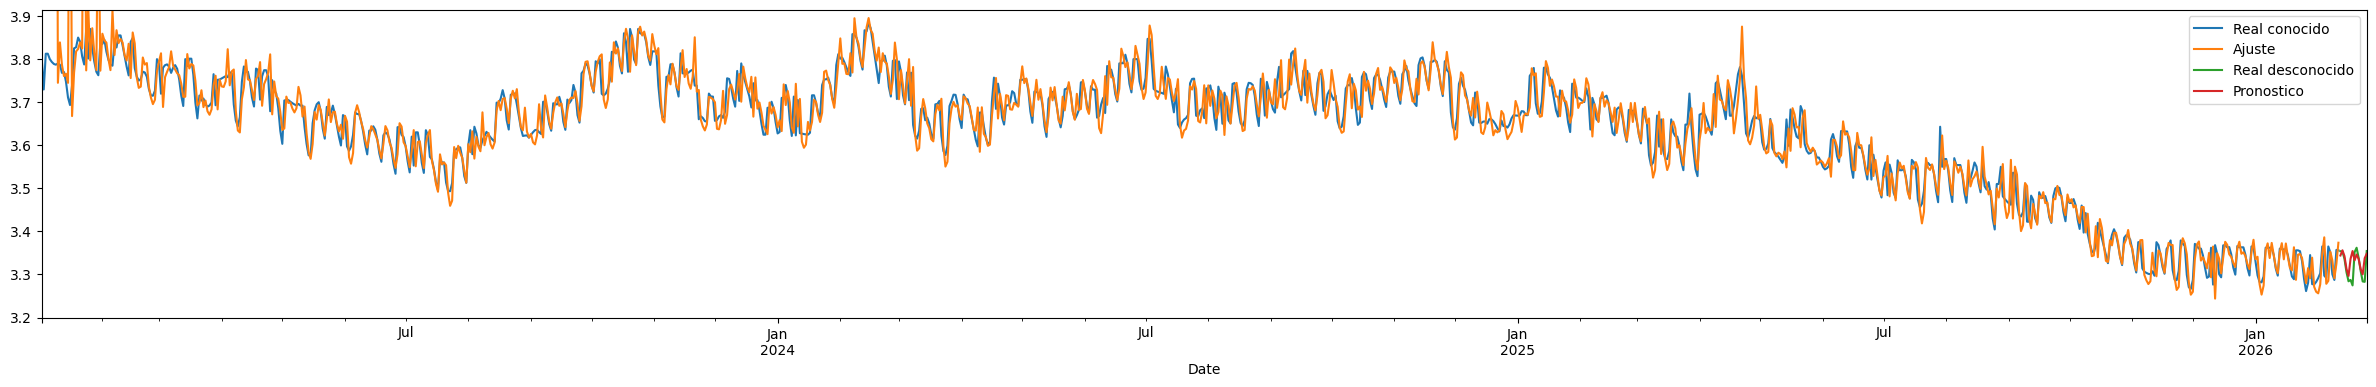

In [ ]:
train.plot(ylim=(3.2),figsize=(30,4),label='Real conocido')
modelo_final.fittedvalues[7:].plot(label='Ajuste')
test.plot(label='Real desconocido')
forecast.plot(label='Pronostico')
plt.legend()
plt.show()

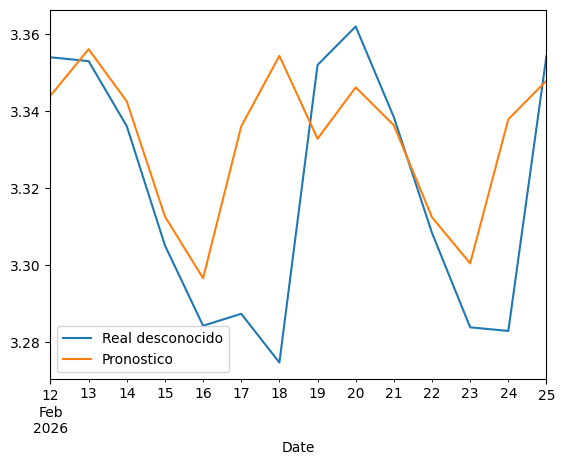

In [ ]:
test.plot(label='Real desconocido')
forecast.plot(label='Pronostico')
plt.legend()
plt.show()